### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib as plt

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/AlphabetSoupCharity.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [4]:
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(['EIN'],axis =1)

In [6]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
print (application_df.nunique())

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [7]:
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                      1260
TOPS CLUB INC                                                765
UNITED STATES BOWLING CONGRESS INC                           700
WASHINGTON STATE UNIVERSITY                                  492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC              408
                                                            ... 
PIPCOMMUNITY HUMAN ECONOMIC DEVELOPMENT-REVITALIZING OUR       1
GREATER MODESTO INTERFAITH HOSPITALITY NETWORK INC             1
FEEDING OUR COMMUNITY OURSELVES INC                            1
KINGDOM AIR CORPS INC                                          1
MISSOURI KANSAS WIRELESS ASSOCIATION                           1
Name: NAME, Length: 19568, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df_counts = application_df['NAME'].value_counts()
application_df_counts

PARENT BOOSTER USA INC                                      1260
TOPS CLUB INC                                                765
UNITED STATES BOWLING CONGRESS INC                           700
WASHINGTON STATE UNIVERSITY                                  492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC              408
                                                            ... 
PIPCOMMUNITY HUMAN ECONOMIC DEVELOPMENT-REVITALIZING OUR       1
GREATER MODESTO INTERFAITH HOSPITALITY NETWORK INC             1
FEEDING OUR COMMUNITY OURSELVES INC                            1
KINGDOM AIR CORPS INC                                          1
MISSOURI KANSAS WIRELESS ASSOCIATION                           1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

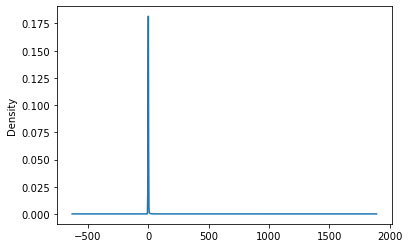

In [9]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_df_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
# Determine which values to replace
replace_application = list(application_df_counts[application_df_counts <= 5].index)  # this created the list nmaed replaced_application

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

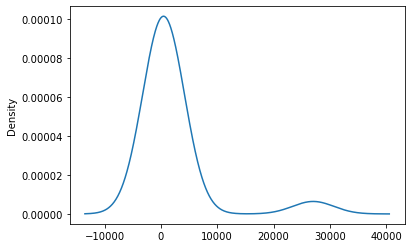

In [12]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
application_df_APPLICATION_TYPE_counts = application_df['APPLICATION_TYPE'].value_counts()
application_df_APPLICATION_TYPE_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_application_type = list(application_df_APPLICATION_TYPE_counts[application_df_APPLICATION_TYPE_counts < 500].index)

# Replace in dataframe
for app in replace_application_type:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
application_df_CLASSIFICATION_counts = application_df.CLASSIFICATION.value_counts()
application_df_CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1248        1
C4120        1
C8210        1
C1820        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [18]:
# Determine which values to replace if counts are less than 1000
replace_classification = list(application_df_CLASSIFICATION_counts[application_df_CLASSIFICATION_counts < 1000].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [20]:
application_df.dtypes[application_df.dtypes=='object']

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
dtype: object

In [21]:
application_df_categories = application_df.dtypes[application_df.dtypes=='object'].index.tolist()

In [22]:
application_df_categories

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [23]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_df_categories = application_df.dtypes[application_df.dtypes=='object'].index.tolist()

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_df_categories]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_df_categories)
encode_df.head()

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_df_categories)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_df_categories, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis=1).values
# Split the preprocessed data into a training and testing dataset
# YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [27]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))


# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 90)                35910     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 38,961
Trainable params: 38,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [32]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')

In [34]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.4942 - accuracy: 0.7735

Epoch 00001: saving model to checkpoints\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - ETA: 0s - loss: 0.4421 - accuracy: 0.79 - 3s 3ms/step - loss: 0.4420 - accuracy: 0.7918

Epoch 00002: saving model to checkpoints\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4339 - accuracy: 0.7961

Epoch 00003: saving model to checkpoints\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4296 - accuracy: 0.7966

Epoch 00004: saving model to checkpoints\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4267 - accuracy: 0.7958

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4249 - accuracy: 0.7981

Epoch 00006: saving model to checkpoints\weights.06.hdf5
Epoc


Epoch 00050: saving model to checkpoints\weights.50.hdf5
Epoch 51/100
804/804 [==============================] - 3s 4ms/step - loss: 0.4059 - accuracy: 0.8066

Epoch 00051: saving model to checkpoints\weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4053 - accuracy: 0.8066

Epoch 00052: saving model to checkpoints\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4055 - accuracy: 0.8066

Epoch 00053: saving model to checkpoints\weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4051 - accuracy: 0.8068

Epoch 00054: saving model to checkpoints\weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4049 - accuracy: 0.8069

Epoch 00055: saving model to checkpoints\weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4049 - accuracy: 0.8077

Epoch 00056: saving model to checkpoint

804/804 [==============================] - 2s 3ms/step - loss: 0.4015 - accuracy: 0.8086

Epoch 00100: saving model to checkpoints\weights.100.hdf5


In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4505 - accuracy: 0.7885
Loss: 0.45052194595336914, Accuracy: 0.7884548306465149


In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4505 - accuracy: 0.7885
Loss: 0.45052194595336914, Accuracy: 0.7884548306465149


In [37]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")